# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/churn_modeling/data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68.0,8.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69.0,9.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71.0,9.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df.dropna(inplace=True)

---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [ ]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(8059, 61)
(8059,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6044, 61)
(6044,)
(2015, 61)
(2015,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm.

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging.

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [ ]:
# Add model training in here!
model = RandomForestClassifier(n_estimators=100, random_state=42) # Add parameters to the model!
model.fit(X_train, y_train) # Complete this method call!

RandomForestClassifier(random_state=42)

### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8997518610421836
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      1810
         1.0       0.67      0.03      0.06       205

    accuracy                           0.90      2015
   macro avg       0.78      0.51      0.50      2015
weighted avg       0.88      0.90      0.86      2015



## Feature importance

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

In [ ]:
indices

array([ 5, 14,  0,  3, 11, 12, 49,  2, 15, 10, 36, 51, 22, 38, 16, 34,  6,
       31, 25, 42, 44, 52, 48, 41, 50, 23, 39, 17, 37, 19,  7, 24,  1, 43,
       13, 32, 18, 28, 55, 26, 35, 60, 40, 45, 47, 27, 57,  8,  9, 58, 21,
       20, 59, 33, 53, 54, 56, 30, 29,  4, 46])

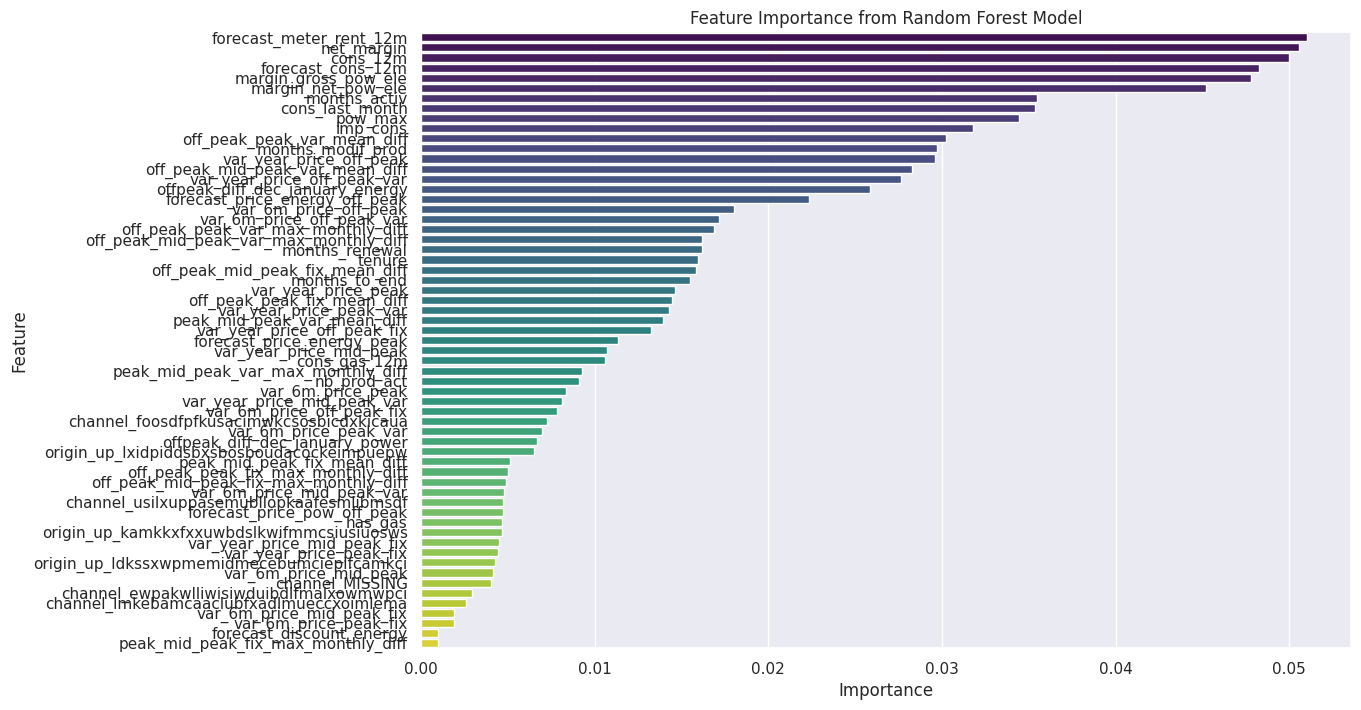

In [ ]:
features = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. feature forecast_meter_rent_12m (0.05100862587681638)
2. feature net_margin (0.05055275353260469)
3. feature cons_12m (0.049964571774071286)
4. feature forecast_cons_12m (0.04828622284607222)
5. feature margin_gross_pow_ele (0.04780732364515857)
6. feature margin_net_pow_ele (0.04521249024991815)
7. feature months_activ (0.0354592830955314)
8. feature cons_last_month (0.03538535723748498)
9. feature pow_max (0.03443528053511529)
10. feature imp_cons (0.0317880376909822)
11. feature off_peak_peak_var_mean_diff (0.030258520444691756)
12. feature months_modif_prod (0.029718153895820467)
13. feature var_year_price_off_peak (0.02960238277746955)
14. feature off_peak_mid_peak_var_mean_diff (0.028280188823446177)
15. feature var_year_price_off_peak_var (0.027665418881157783)
16. feature offpeak_diff_dec_january_energy (0.02584394312194476)
17. feature forecast_price_energy_off_peak (0.022373161193498737)
18. feature var_6m_price_off_peak (0.018015648278539444)
19. feature 

### Model Evaluation and Performance Analysis
In this section, we will evaluate the performance of our Random Forest model using several key metrics. We have chosen to use the confusion matrix, ROC curve, and precision-recall curve to assess our model's performance. Each of these metrics provides valuable insights into different aspects of the model's behavior.

The confusion matrix provides a detailed breakdown of the model’s predictions. It shows:

True Positives (TP): The number of positive instances correctly predicted as positive.

True Negatives (TN): The number of negative instances correctly predicted as negative.

False Positives (FP): The number of negative instances incorrectly predicted as positive.

False Negatives (FN): The number of positive instances incorrectly predicted as negative.

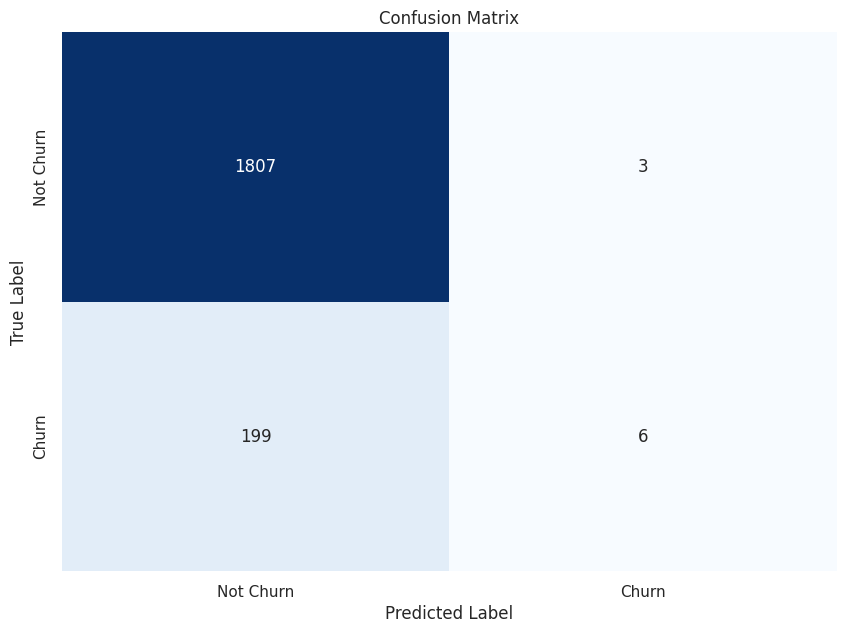

In [ ]:
#plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ROC curve

The Receiver Operating Characteristic (ROC) curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. It helps us evaluate how well our model distinguishes between the positive and negative classes.

The area under the ROC curve (AUC) represents the model's ability to discriminate between classes, with a value of 1 indicating perfect discrimination and 0.5 indicating no discrimination. We will plot the ROC curve to assess the model's performance.

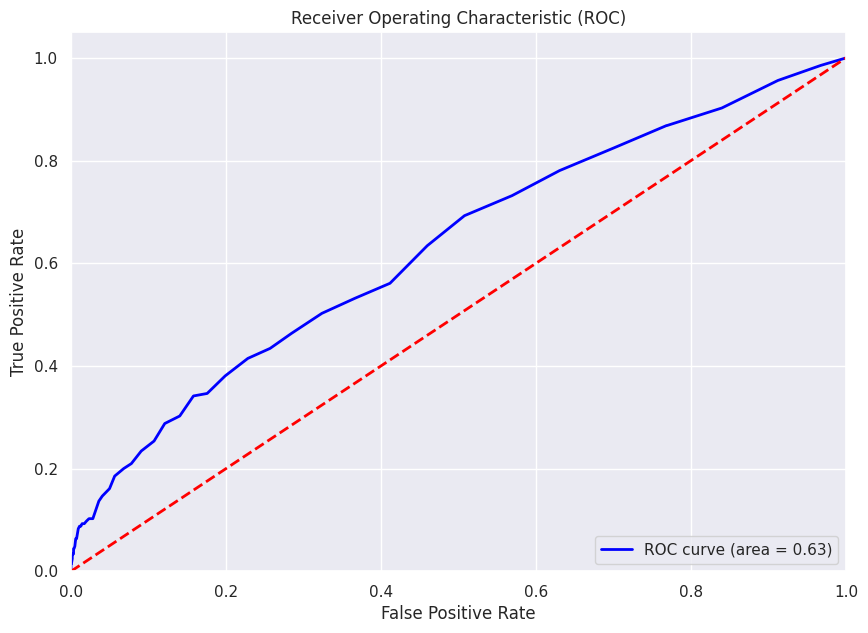

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Precision-recall curve

The precision-recall curve plots precision against recall for different threshold values. Precision measures the accuracy of the positive predictions, while recall measures the model's ability to find all positive instances. This curve helps us understand the trade-off between precision and recall.

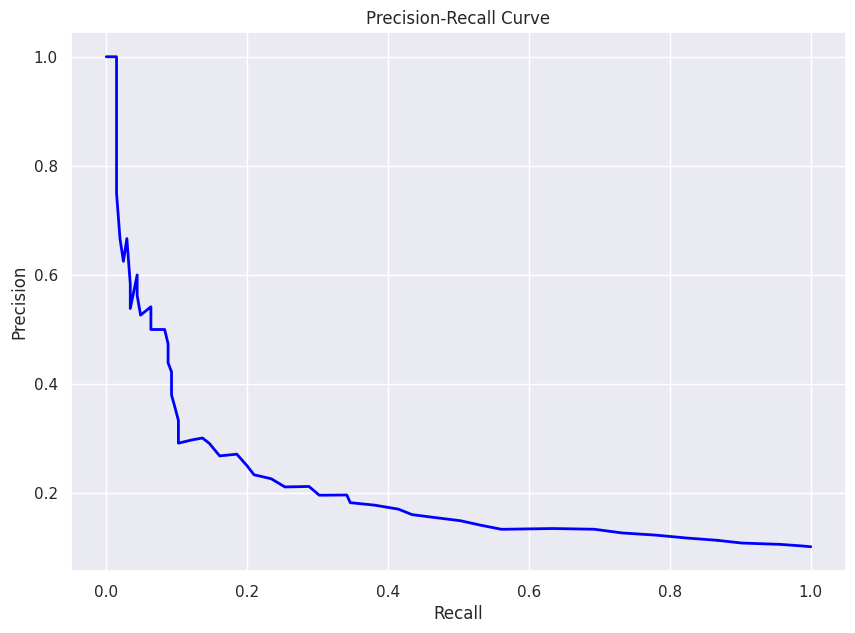

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Predictions:", y_pred[:10])
print("Predicted probabilities for class 1:", y_pred_proba[:10])

Predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted probabilities for class 1: [0.02 0.07 0.06 0.19 0.19 0.18 0.   0.05 0.03 0.13]


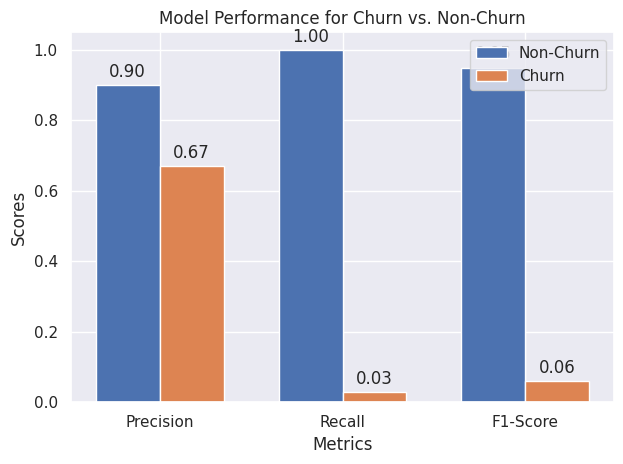

In [ ]:
metrics = ['Precision', 'Recall', 'F1-Score']
churn_scores = [0.67, 0.03, 0.06]  # Precision, Recall, F1-Score for churn (1.0)
non_churn_scores = [0.90, 1.00, 0.95]  # Precision, Recall, F1-Score for non-churn (0.0)

# Set up the figure and axis
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, non_churn_scores, width, label='Non-Churn')
bars2 = ax.bar(x + width/2, churn_scores, width, label='Churn')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance for Churn vs. Non-Churn')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add value labels on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

fig.tight_layout()

plt.show()

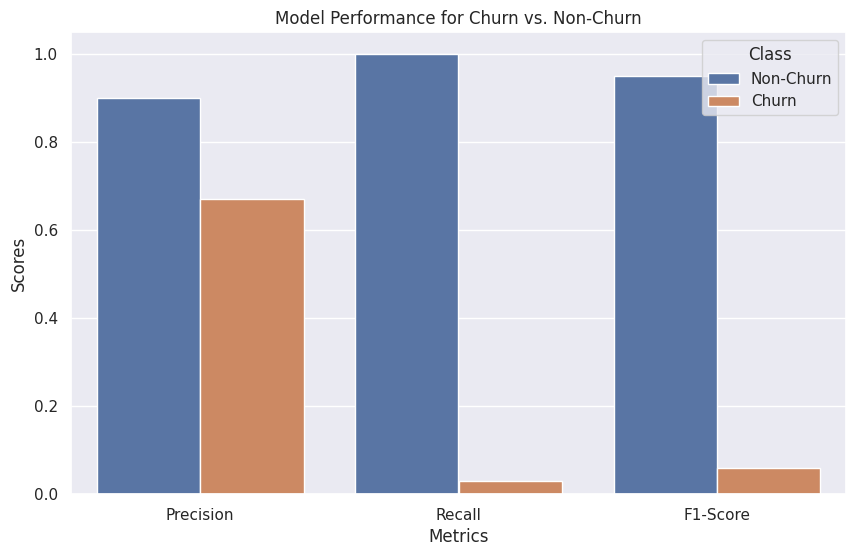

In [ ]:
data = {
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Non-Churn': [0.90, 1.00, 0.95],
    'Churn': [0.67, 0.03, 0.06]
}

df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting
df_melted = df.melt(id_vars='Metric', var_name='Class', value_name='Score')

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Class', data=df_melted)

plt.title('Model Performance for Churn vs. Non-Churn')
plt.xlabel('Metrics')
plt.ylabel('Scores')

plt.show()

### Evaluation and Model Performance
#### Why We Chose These Metrics Confusion Matrix:
Provides a detailed breakdown of prediction errors, allowing us to understand how well the model distinguishes between classes and where it is making mistakes.

#### ROC Curve:
Useful for evaluating the model's performance across different thresholds and understanding its overall capability to differentiate between classes.

#### Precision-Recall Curve:
Highlights the trade-offs between precision and recall, which is crucial when dealing with imbalanced datasets where one class may be more prevalent than the other.

### Model Performance Assessment

Based on the visualizations:

The confusion matrix shows the distribution of predictions and helps us identify where the model is making errors.
The ROC curve provides insight into the model's ability to distinguish between churn and non-churn instances. A higher AUC indicates better performance.
The precision-recall curve allows us to evaluate how well the model balances precision and recall.

## Actionable Business Insights

1. Identifying High-Risk Customers
Our Random Forest model has been designed to predict customer churn, which refers to the likelihood of customers leaving our service. Here are key insights based on our model's results:

2. Target High-Risk Customers
Action: Use the model's predictions to identify customers who are at high risk of churning. These are customers who have a higher likelihood of leaving our service.

Benefit: By focusing on these high-risk customers, we can implement targeted retention strategies such as personalized offers, improved customer support, or special discounts. This proactive approach can help reduce churn rates and retain valuable customers.
Optimize Marketing and Customer Support
Action: Analyze the characteristics of high-risk customers identified by the model. Look for common factors such as usage patterns, billing issues, or service interactions.
Benefit: Tailor marketing and customer support efforts to address these factors. For example, if the model identifies that customers with certain billing issues are more likely to churn, we can improve our billing process and offer more flexible payment options.

4. Improving Customer Satisfaction
Our model helps us understand which customers are more likely to leave. Using this information, we can enhance overall customer satisfaction.

5. Enhance Service Features
Action: Review feedback and usage patterns from high-risk customers to identify areas for service improvement.
Benefit: Addressing the issues highlighted by these customers can lead to an enhanced service experience, which may reduce churn and increase overall customer satisfaction.
Develop Retention Programs
Action: Implement retention programs based on the model’s insights. For instance, create loyalty programs or special incentives for customers who are at risk of churning.
Benefit: These programs can improve customer engagement and loyalty, ultimately leading to lower churn rates and higher customer lifetime value.
3. Strategic Decision-Making
The insights from the model can inform strategic decisions and investments.

Allocate Resources Effectively
Action: Prioritize resources and budget allocation based on the likelihood of churn. Focus more on retaining high-risk customers rather than equally distributing resources.
Benefit: This targeted approach ensures that efforts are concentrated where they will have the most impact, leading to more efficient use of resources and potentially better returns.
Monitor and Adapt
Action: Continuously monitor churn predictions and adjust strategies as needed. Regularly update the model with new data to maintain accuracy.
Benefit: Staying adaptable and responsive to changing customer behaviors and market conditions will help keep churn rates under control and support long-term business success.